In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
languages = ['python', 'julia', 'c', 'c-otimizado', 'r', 'java']

## Host

In [3]:
frames = []
for lang in languages:
    tmp = pd.read_csv(f'./host/results-host-{lang}.csv')
    tmp.insert(0, 'language', lang)
    frames.append(tmp)
df = pd.concat(frames, ignore_index=True)
df = df.astype({'avg time': float, 'min time': float, 'max time': float, 'std dev': float})

In [4]:
tmp = df['function name'].str.rsplit('_', n=1, expand=True)
df['function name'] = tmp[0]
df.insert(2, 'instance', tmp[1])

In [5]:
df

,language,function name,instance,avg time,min time,max time,std dev
0,python,copy_matrix,5000,12.374828,12.363077,12.389808,0.013655
1,python,copy_matrix,7000,0.866607,0.859691,0.872079,0.006319
2,python,copy_matrix,9000,1.465662,1.432810,1.528046,0.054052
3,python,look_and_say_sequence,40,1.009808,0.866428,1.284071,0.237601
4,python,look_and_say_sequence,45,21.578715,19.641207,24.093685,2.281718
...,...,...,...,...,...,...,...
209,java,evaluate_functions,80000,303.571333,303.463000,303.776000,0.177348
210,java,evaluate_functions,90000,339.917000,338.891000,340.747000,0.943396
211,java,evaluate_functions,100000,378.354667,378.013000,378.570000,0.299220
212,java,find_pernicious_numbers,100000,0.007000,0.007000,0.007000,0.000000


/tmp/ipykernel_117137/1497386202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['final'] = df_test['language'] + ' - ' + df_test['instance']
/tmp/ipykernel_117137/1497386202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['final'] = df_test['language'] + ' - ' + df_test['instance']
/tmp/ipykernel_117137/1497386202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

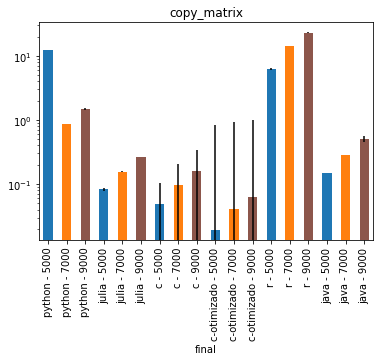

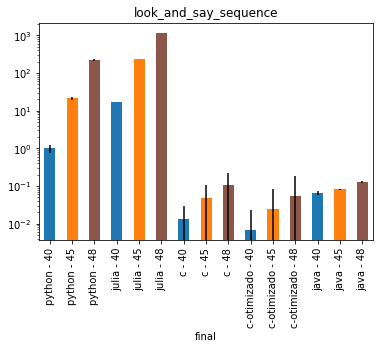

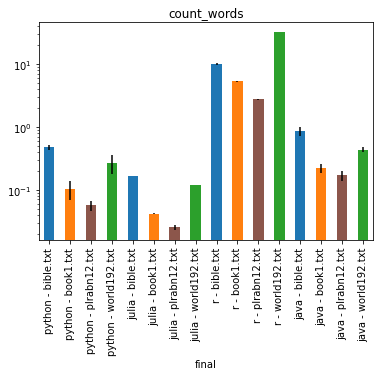

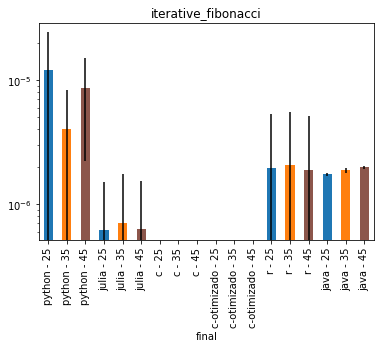

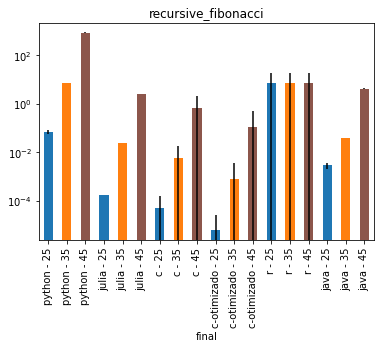

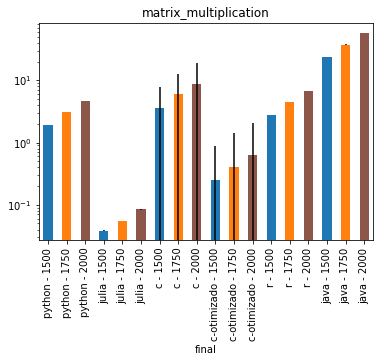

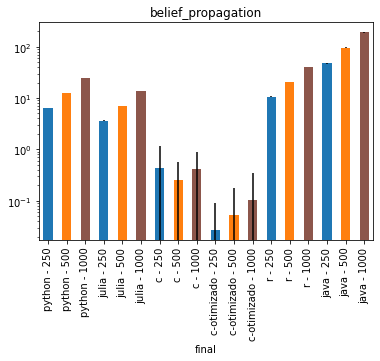

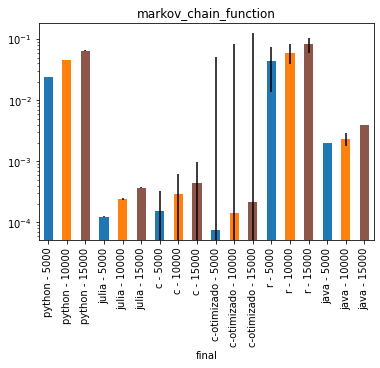

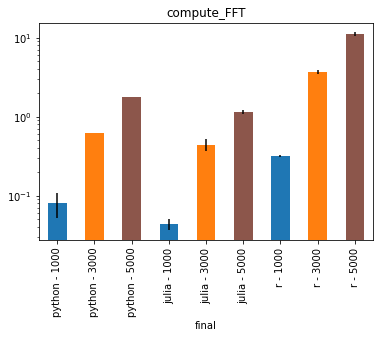

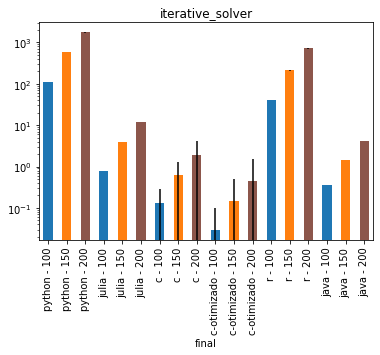

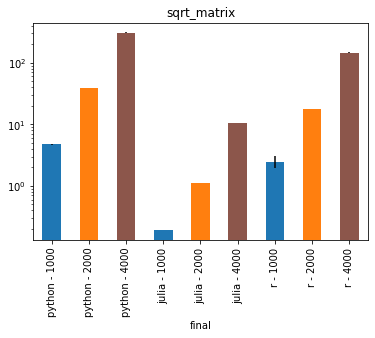

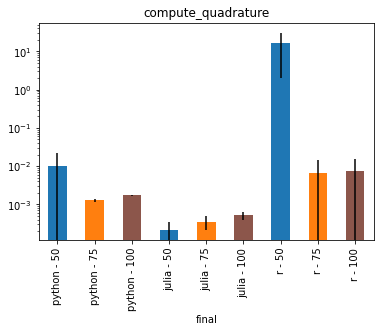

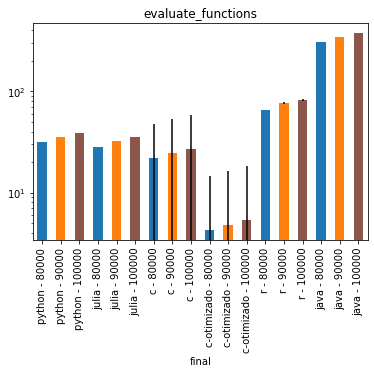

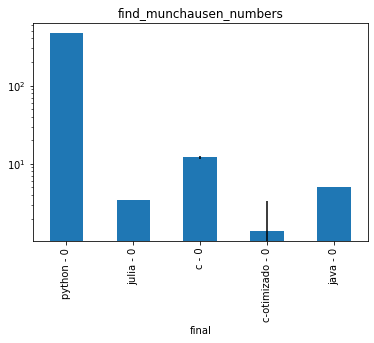

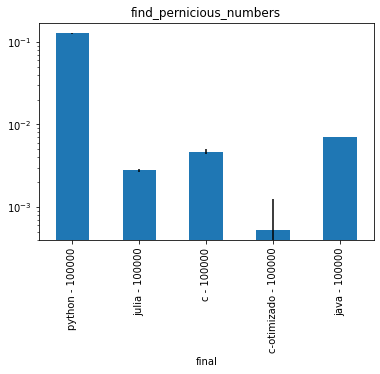

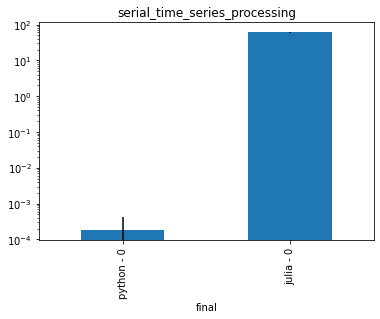

In [6]:
pallet = ['#1f77b4', '#ff7f0f', '#8c564b', '#2ca02c']
for func in df['function name'].unique():
    df_test = df.groupby('function name').get_group(func)
    lim = len(df_test['instance'].unique())
    df_test['final'] = df_test['language'] + ' - ' + df_test['instance'] 
    ax = df_test.plot(logy=True, title=func, legend=False, kind='bar', 
                 x='final', y='avg time', yerr='std dev', 
                 color=pallet[:lim]);
    ax.get_figure().savefig(f'./img_host/{func}.png')
    